In [2]:
#Kütüphanelerimizi import edelim
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import seaborn as sns

## Datayı yükle

In [3]:
data = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv', delimiter=',',index_col=0) 
#datamızı indirip okuyalım
data

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [4]:
data.head()  #ilk 5 verisine bakalım

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [5]:
missing_values = data.isnull().sum().sum() #Eksik veri var mı diye kontrol edelim
print('There are %s missing values in the Dataframe!' %(missing_values))
print()

There are 4 missing values in the Dataframe!



## Kayıp veri hangi sütunların elemanlarında

In [6]:
cols = data.columns
print(cols)

Index(['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')


In [8]:
for col in cols:
    temp = data[col].isnull().values.sum()
    print(f'Column {col} has {temp} missing values')   #Kayıp veri Price sütününda

Column Address has 0 missing values
Column Zip has 0 missing values
Column Price has 4 missing values
Column Area has 0 missing values
Column Room has 0 missing values
Column Lon has 0 missing values
Column Lat has 0 missing values


In [9]:
data.isnull().sum()  # eksik veri var mı diye kontrol edelim 

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [10]:
data.isnull().sum().sum()  #Toplam eksik veri sayısına bakar

4

In [11]:
data.dropna() #eksik verileri gecice olarak kaldıralım

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [12]:
# add a new column 'PriceQm' which represents the price per squaremeter and round for two decimals
data['PriceM2'] = data.Price / data.Area
data['PriceM2'] = data['PriceM2'].round(2)

In [13]:
data

,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,10703.12
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,7916.67
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,7798.17
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,4531.25
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,5217.39
...,...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,6410.26
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,4861.11
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,6862.75
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,5300.88


<AxesSubplot: xlabel='Room'>

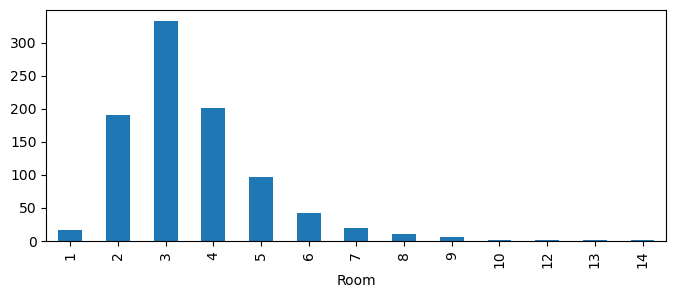

In [14]:
# visualize the distribution how many houses have how many rooms 
#dağılımı görselleştirin kaç evin kaç odası var
plt.figure(figsize=(8,3))
houses_rooms = data.groupby('Room').size()
houses_rooms.plot.bar()

<AxesSubplot: >

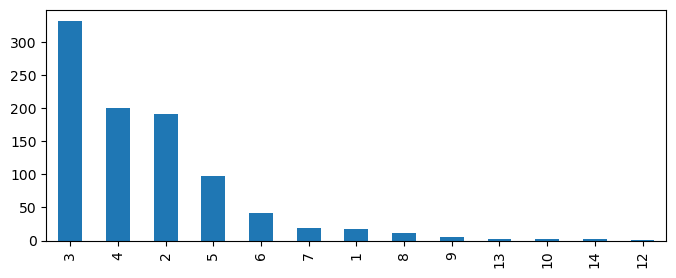

In [15]:
plt.figure(figsize=(8,3))
data.Room.value_counts().plot.bar()

In [16]:
data[data.Room > 10]   

,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2
104,"Westeinde 16, Amsterdam",1017 ZP,4550000.0,497,13,4.898620,52.358798,9154.93
306,"Singel 318, Amsterdam",1016 AE,4900000.0,623,13,4.887869,52.371039,7865.17
309,"Broekergouw 4, Amsterdam",1027 AH,1695000.0,467,14,4.970830,52.412038,3629.55
322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877,NaN
838,"Oranje Nassaulaan 9, Amsterdam",1075 AH,5850000.0,480,14,4.863729,52.354874,12187.50


## Temizle

In [17]:
veri_saglikli = data.dropna()

In [18]:
data['ZipNo'] = veri_saglikli['Zip'].apply(lambda x: int(x.split(' ')[0]))
data['AreaCode'] = veri_saglikli['Zip'].apply(lambda x: str(x.split(' ')[1]))
data.head()

,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2,ZipNo,AreaCode
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,10703.12,1091.0,CR
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,7916.67,1059.0,EL
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,7798.17,1097.0,SM
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,4531.25,1060.0,TH
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,5217.39,1036.0,KN


In [19]:
veri = veri_saglikli.drop(['Address', 'Zip'], axis=1)

In [20]:
veri.head()

,Price,Area,Room,Lon,Lat,PriceM2
1,685000.0,64,3,4.907736,52.356157,10703.12
2,475000.0,60,3,4.850476,52.348586,7916.67
3,850000.0,109,4,4.944774,52.343782,7798.17
4,580000.0,128,6,4.789928,52.343712,4531.25
5,720000.0,138,5,4.902503,52.410538,5217.39


In [21]:
veri.describe()

,Price,Area,Room,Lon,Lat,PriceM2
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271,6479.852348
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054,2219.265329
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519,2430.560000
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925,4649.085000
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499,6578.950000
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545,7768.915000
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805,25252.810000


<AxesSubplot: xlabel='Price'>

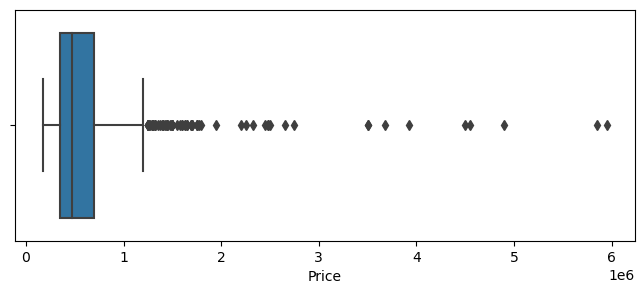

In [22]:
plt.figure(figsize=(8,3))
sns.boxplot(data=veri, x=veri['Price'])

## Outlierları Çıkar

In [23]:
q1 = veri.describe()['Price']['25%']

In [24]:
q3 = veri.describe()['Price']['75%']

In [25]:
fark = q3 -q1
max_ucret = q3 + 1.5*fark

In [26]:
outlier        = veri[veri['Price']>=max_ucret]
outlier_sayisi = outlier['Price'].count()
veri_sayisi    = veri['Price'].count()
print('Outlier veri yuzdesi: ' + str(round(outlier_sayisi/veri_sayisi * 100, 2)) + '%')

Outlier veri yuzdesi: 7.72%


In [27]:
temiz_veri = veri[veri['Price'] <= max_ucret]

<AxesSubplot: xlabel='Price'>

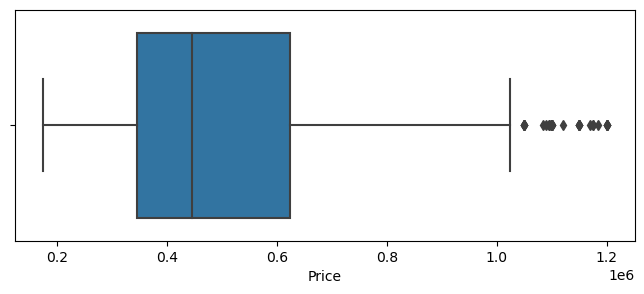

In [28]:
plt.figure(figsize=(8,3))
sns.boxplot(data=temiz_veri, x=temiz_veri['Price'])

<AxesSubplot: >

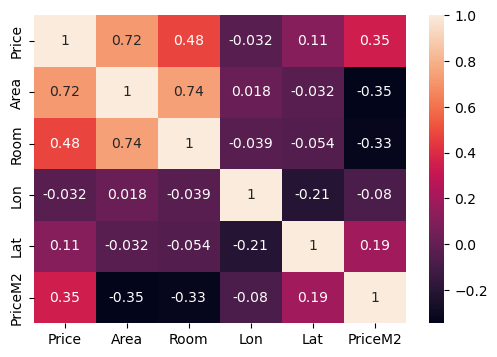

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(temiz_veri.corr(), annot = True)

## Model Yapımı

In [30]:
y = temiz_veri['Price']
X = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

X.head()   #Train test için X ve y değerlerimizi oluşturalım

,Area,Room,Lon,Lat
1,64,3,4.907736,52.356157
2,60,3,4.850476,52.348586
3,109,4,4.944774,52.343782
4,128,6,4.789928,52.343712
5,138,5,4.902503,52.410538


In [46]:
# Labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y=le.fit_transform(y)   # 0 - 1 için gereklidir

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)  #train ve test için bölmemiz gerekir

In [51]:
model = LinearRegression()   #modelimizi fit edelim ve LinearRegression makine öğrenimi algoritmasını kullanalım
model.fit(X_train,y_train)

LinearRegression()

In [53]:
pred= model.predict(X_test)  #Tahmin edelim

In [54]:
model.score(X_train, y_train)  #tahmin scoremuzu oluşturalım

0.5244685946560128

In [55]:
model.score(X_test, y_test)

0.5112349672986133

In [56]:
y_test_np = np.array(y_test)

In [57]:
u = ((y_test_np - pred)**2).sum()

In [58]:
v = ((y_test_np - y_test_np.mean())**2).sum()

In [59]:
1 - u/v

0.5112349672986133

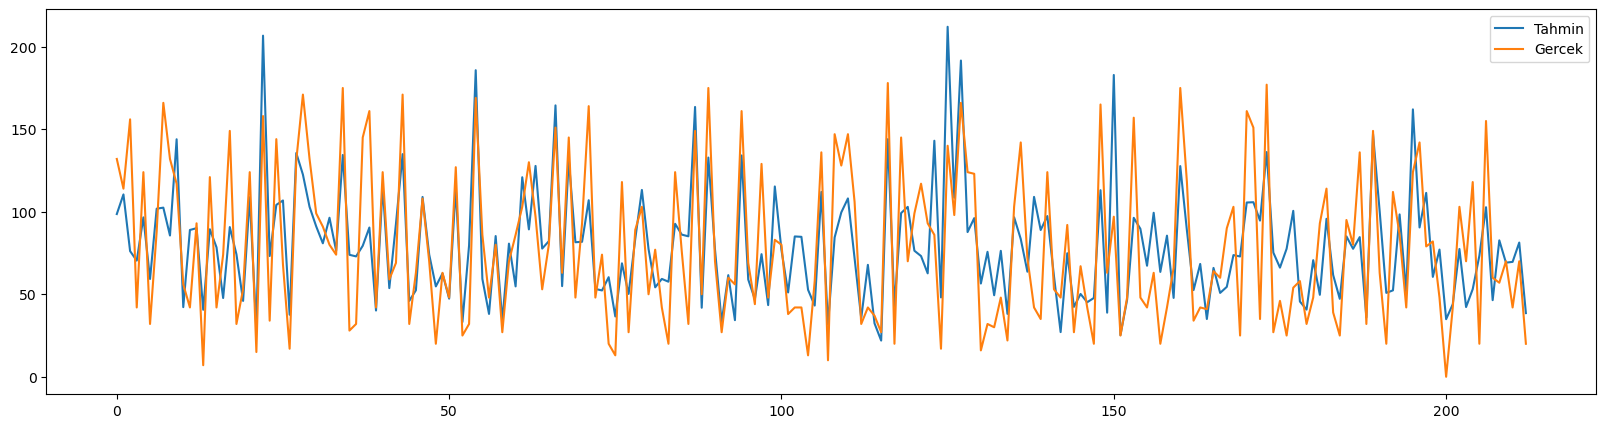

In [60]:
plt.figure(figsize=(20,5))
plt.plot(pred[:], label='Tahmin')
plt.plot(y_test_np[:], label='Gercek')
plt.legend()     #son tahmin ve test verilemizi görselleştirelim

In [61]:
## devam modelimizi eğitelim 

In [62]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, BayesianRidge, RANSACRegressor

In [63]:
y = temiz_veri['Price']
x = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [65]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
pred= model.predict(x_test)

In [67]:
y_test_np = np.array(y_test)

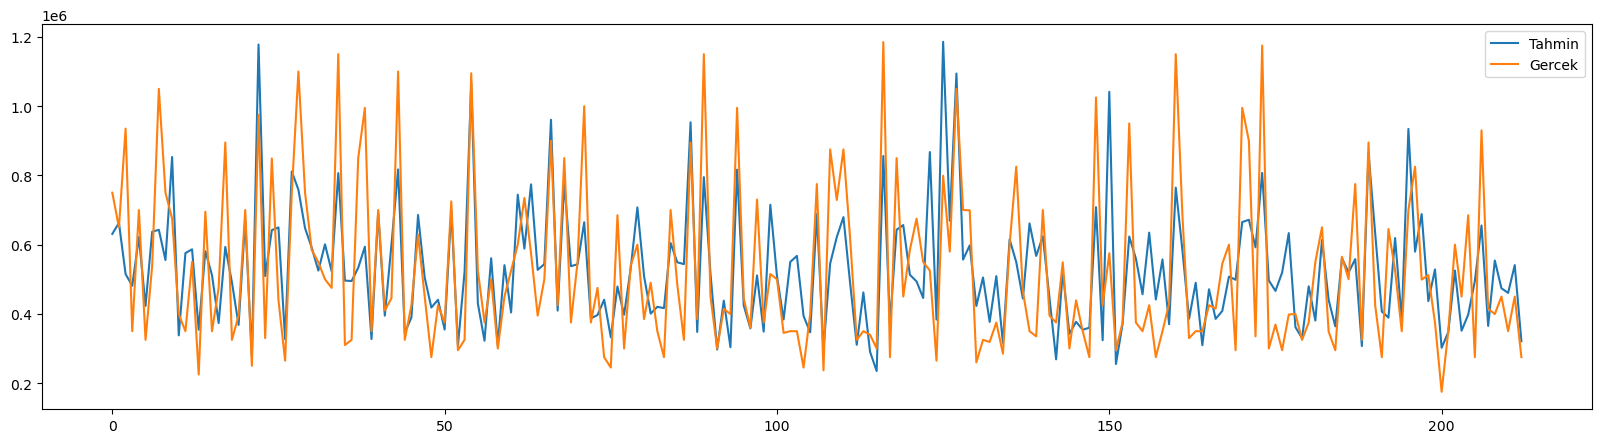

In [68]:
plt.figure(figsize=(20,5))
plt.plot(pred[:], label='Tahmin')
plt.plot(y_test_np[:], label='Gercek')
plt.legend()

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [70]:
model = RandomForestRegressor()
# model = RandomForestRegressor(n_estimators=56, max_depth=4, bootstrap=True, max_features='auto', min_samples_leaf=1, min_samples_split=2)

In [71]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
pred = model.predict(x_test)

In [73]:
y_test_np = np.array(y_test)

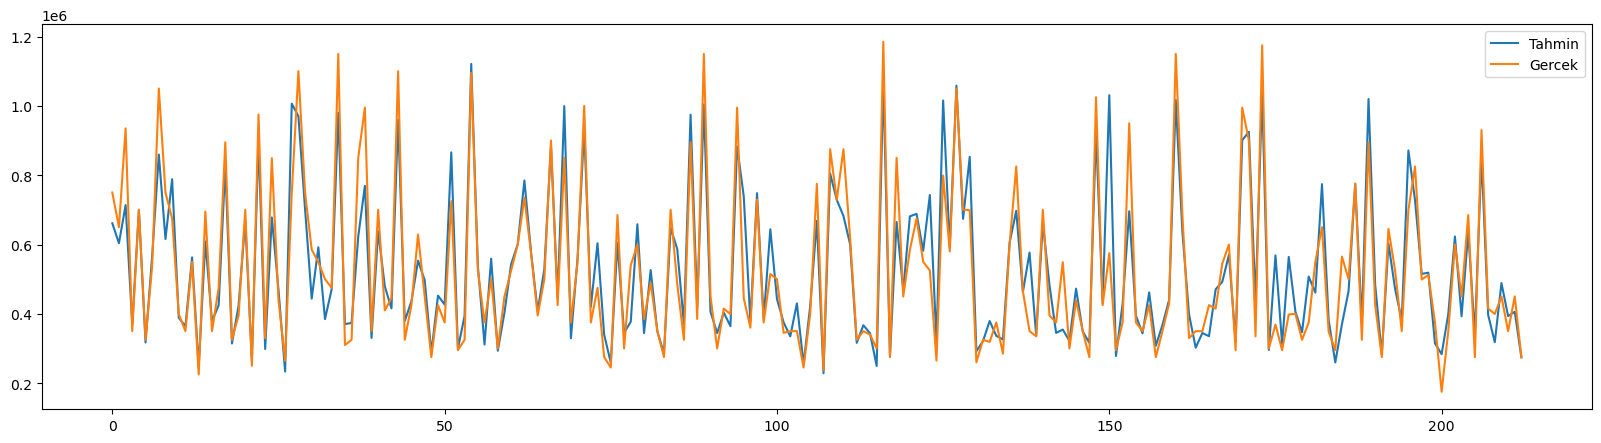

In [74]:
plt.figure(figsize=(20,5))
plt.plot(pred[:], label='Tahmin')
plt.plot(y_test_np[:], label='Gercek')
plt.legend()

In [75]:
mae_rf = np.mean(np.abs(y_test_np - pred))

In [76]:
mae_rf

63555.92128325509

# ---------------------------- Deep Learning Model ----------------------------

In [77]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LeakyReLU, Flatten, Dense, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [78]:
y = temiz_veri['Price']
x = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

In [79]:
x_train, x_diger, y_train, y_diger = train_test_split(x, y, test_size=0.3, random_state=1)

In [80]:
x_val = x_diger[:125]
y_val = y_diger[:125]

C:\Users\muham\AppData\Local\Temp\ipykernel_12092\2689136256.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_val = y_diger[:125]


In [81]:
x_test = x_diger[125:]
y_test = y_diger[125:]

C:\Users\muham\AppData\Local\Temp\ipykernel_12092\292593234.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y_diger[125:]


In [82]:
val_loss = []
train_loss = []

In [83]:
K.clear_session()

input_ = Input(batch_shape= (None, 4))

init = RandomNormal(mean=0, stddev=0.05)

out = Flatten()(input_)

out = Dense(50, kernel_initializer=init)(out) # , activation='relu'
out = LeakyReLU(alpha=0.1)(out)
out = Dense(50, kernel_initializer=init)(out)
out = LeakyReLU(alpha=0.1)(out)

out = Dense(1, activation='linear')(out)

model_dl = Model(inputs=input_, outputs=out)
model_dl.summary()

Model: "model"


C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 50)                250       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
          

In [84]:
checkpoint = ModelCheckpoint('regresyon_dl.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)

In [85]:
model_dl.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss='mae')

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model_dl.fit(np.array(x_train),
                      np.array(y_train),
                      epochs=10000,
                      batch_size=50,
                      steps_per_epoch=10,
                      callbacks=[checkpoint],
                      validation_data= (np.array(x_val), np.array(y_val)),
                      validation_steps=2)

Epoch 1/10000
 1/10 [==>...........................] - ETA: 6s - loss: 537659.1875
Epoch 1: val_loss improved from inf to 553770.37500, saving model to regresyon_dl.h5
10/10 [==============================] - 1s 47ms/step - loss: 504531.1875 - val_loss: 553770.3750
Epoch 2/10000
 1/10 [==>...........................] - ETA: 0s - loss: 542090.5000
Epoch 2: val_loss improved from 553770.37500 to 553758.56250, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 507333.1875 - val_loss: 553758.5625
Epoch 3/10000
 1/10 [==>...........................] - ETA: 0s - loss: 489479.6875
Epoch 3: val_loss improved from 553758.56250 to 553738.75000, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 498061.3750 - val_loss: 553738.7500
Epoch 4/10000
 1/10 [==>...........................] - ETA: 0s - loss: 469681.4062
Epoch 4: val_loss improved from 553738.75000 to 553706.37500, saving model to regresyon_dl.h5
10/10 [

Epoch 31/10000
 1/10 [==>...........................] - ETA: 0s - loss: 431056.8438
Epoch 31: val_loss improved from 527096.75000 to 524205.71875, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 478259.9062 - val_loss: 524205.7188
Epoch 32/10000
 1/10 [==>...........................] - ETA: 0s - loss: 470763.5312
Epoch 32: val_loss improved from 524205.71875 to 521108.62500, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 467671.1562 - val_loss: 521108.6250
Epoch 33/10000
 1/10 [==>...........................] - ETA: 0s - loss: 472287.5312
Epoch 33: val_loss improved from 521108.62500 to 517795.59375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 478896.4688 - val_loss: 517795.5938
Epoch 34/10000
 1/10 [==>...........................] - ETA: 0s - loss: 471728.5938
Epoch 34: val_loss improved from 517795.59375 to 514278.31250, saving model to regres

10/10 [==============================] - 0s 16ms/step - loss: 297526.0938 - val_loss: 328626.5312
Epoch 61/10000
 1/10 [==>...........................] - ETA: 0s - loss: 294200.5312
Epoch 61: val_loss improved from 328626.53125 to 317220.93750, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 293184.9375 - val_loss: 317220.9375
Epoch 62/10000
 1/10 [==>...........................] - ETA: 0s - loss: 266075.3125
Epoch 62: val_loss improved from 317220.93750 to 305510.34375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 269768.4688 - val_loss: 305510.3438
Epoch 63/10000
 1/10 [==>...........................] - ETA: 0s - loss: 278620.4062
Epoch 63: val_loss improved from 305510.34375 to 293399.84375, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 266033.2500 - val_loss: 293399.8438
Epoch 64/10000
 1/10 [==>...........................] - ETA: 0s - loss:

 1/10 [==>...........................] - ETA: 0s - loss: 140914.4062
Epoch 90: val_loss improved from 125765.36719 to 125099.10938, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 121685.7969 - val_loss: 125099.1094
Epoch 91/10000
 1/10 [==>...........................] - ETA: 0s - loss: 137080.4062
Epoch 91: val_loss improved from 125099.10938 to 124649.85938, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 118855.8438 - val_loss: 124649.8594
Epoch 92/10000
 1/10 [==>...........................] - ETA: 0s - loss: 152805.7812
Epoch 92: val_loss improved from 124649.85938 to 124374.93750, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 123889.4062 - val_loss: 124374.9375
Epoch 93/10000
 1/10 [==>...........................] - ETA: 0s - loss: 112369.8594
Epoch 93: val_loss improved from 124374.93750 to 123999.25781, saving model to regresyon_dl.h5
10/10

Epoch 120/10000
 1/10 [==>...........................] - ETA: 0s - loss: 94712.7031
Epoch 120: val_loss improved from 122794.00781 to 122768.89844, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 119983.6172 - val_loss: 122768.8984
Epoch 121/10000
 1/10 [==>...........................] - ETA: 0s - loss: 129375.3906
Epoch 121: val_loss improved from 122768.89844 to 122766.85938, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 120269.0312 - val_loss: 122766.8594
Epoch 122/10000
 1/10 [==>...........................] - ETA: 0s - loss: 128905.5625
Epoch 122: val_loss improved from 122766.85938 to 122741.10156, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 119407.0469 - val_loss: 122741.1016
Epoch 123/10000
 1/10 [==>...........................] - ETA: 0s - loss: 132649.1875
Epoch 123: val_loss improved from 122741.10156 to 122732.43750, saving model to

10/10 [==============================] - 0s 42ms/step - loss: 118757.7188 - val_loss: 122359.7969
Epoch 150/10000
 1/10 [==>...........................] - ETA: 0s - loss: 128848.0078
Epoch 150: val_loss improved from 122359.79688 to 122339.10938, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 120804.5859 - val_loss: 122339.1094
Epoch 151/10000
 1/10 [==>...........................] - ETA: 0s - loss: 135727.9844
Epoch 151: val_loss improved from 122339.10938 to 122318.85938, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 120868.9453 - val_loss: 122318.8594
Epoch 152/10000
 1/10 [==>...........................] - ETA: 0s - loss: 100747.0234
Epoch 152: val_loss improved from 122318.85938 to 122306.70312, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 118601.2266 - val_loss: 122306.7031
Epoch 153/10000
 1/10 [==>...........................] - ETA: 0s 

 1/10 [==>...........................] - ETA: 0s - loss: 121446.8828
Epoch 179: val_loss improved from 121921.97656 to 121911.10156, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 118533.2031 - val_loss: 121911.1016
Epoch 180/10000
 1/10 [==>...........................] - ETA: 0s - loss: 114751.9766
Epoch 180: val_loss did not improve from 121911.10156
10/10 [==============================] - 0s 8ms/step - loss: 118889.1094 - val_loss: 121915.0234
Epoch 181/10000
 1/10 [==>...........................] - ETA: 0s - loss: 122349.1562
Epoch 181: val_loss improved from 121911.10156 to 121893.53906, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 17ms/step - loss: 119794.6250 - val_loss: 121893.5391
Epoch 182/10000
 1/10 [==>...........................] - ETA: 0s - loss: 129313.4688
Epoch 182: val_loss improved from 121893.53906 to 121875.77344, saving model to regresyon_dl.h5
10/10 [==============================] - 

10/10 [==============================] - 0s 16ms/step - loss: 118004.7188 - val_loss: 121505.0391
Epoch 209/10000
 1/10 [==>...........................] - ETA: 0s - loss: 137063.2344
Epoch 209: val_loss improved from 121505.03906 to 121495.00000, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 16ms/step - loss: 122357.7734 - val_loss: 121495.0000
Epoch 210/10000
 1/10 [==>...........................] - ETA: 0s - loss: 126456.3594
Epoch 210: val_loss improved from 121495.00000 to 121469.07812, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 15ms/step - loss: 119897.2969 - val_loss: 121469.0781
Epoch 211/10000
 1/10 [==>...........................] - ETA: 0s - loss: 101075.4297
Epoch 211: val_loss did not improve from 121469.07812
10/10 [==============================] - 0s 8ms/step - loss: 118022.7969 - val_loss: 121476.6172
Epoch 212/10000
 1/10 [==>...........................] - ETA: 0s - loss: 143805.4375
Epoch 212: val_loss imp

Epoch 239/10000
 1/10 [==>...........................] - ETA: 0s - loss: 116617.4062
Epoch 239: val_loss did not improve from 121122.42188
10/10 [==============================] - 0s 8ms/step - loss: 120012.1562 - val_loss: 121126.1406
Epoch 240/10000
 1/10 [==>...........................] - ETA: 0s - loss: 135242.0938
Epoch 240: val_loss improved from 121122.42188 to 121113.74219, saving model to regresyon_dl.h5
10/10 [==============================] - 0s 18ms/step - loss: 118693.4062 - val_loss: 121113.7422
Epoch 241/10000
 1/10 [==>...........................] - ETA: 0s - loss: 102690.0703
Epoch 241: val_loss did not improve from 121113.74219
10/10 [==============================] - 0s 8ms/step - loss: 120480.1953 - val_loss: 121123.7266
Epoch 242/10000
 1/10 [==>...........................] - ETA: 0s - loss: 105458.3203
Epoch 242: val_loss did not improve from 121113.74219
10/10 [==============================] - 0s 8ms/step - loss: 116181.9844 - val_loss: 121121.9219
Epoch 243/100

In [ ]:
pred_dl = model_dl.predict(x_test)

In [ ]:
plt.plot(pred_dl)
plt.plot(np.array(y_test))

In [ ]:
mae_dl = np.mean(np.abs(pred_dl - np.array(y_test)))

In [ ]:
mae_dl

# ------------------------- Deep Learning Model Part2 -------------------------

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import Callback

In [ ]:
y = temiz_veri['Price']
x = temiz_veri.drop(['Price', 'PriceM2'], axis = 1)

In [ ]:
girdi_scaler = MinMaxScaler()
cikti_scaler = MinMaxScaler()

In [ ]:
girdi_scaler.fit(x)
cikti_scaler.fit(np.array(y).reshape(-1,1))

In [ ]:
x_scaled = girdi_scaler.transform(x)

In [ ]:
y_scaled = cikti_scaler.transform(np.array(y).reshape(-1,1))

In [ ]:
x_train, x_diger, y_train, y_diger = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=1)
x_val = x_diger[:125]
y_val = y_diger[:125]
x_test = x_diger[125:]
y_test = y_diger[125:]

In [ ]:
val_loss = np.array([])
train_loss = np.array([])

In [ ]:
K.clear_session()

input_ = Input(batch_shape= (None, 4))

init = RandomNormal(mean=0, stddev=0.05)

out = Flatten()(input_)

out = Dense(50, kernel_initializer=init, activation='relu')(out)

out = Dense(50, kernel_initializer=init)(out)
out = LeakyReLU(alpha=0.1)(out)

out = Dense(1, activation='linear')(out)

model_dl_scaled_inputs = Model(inputs=input_, outputs=out)
model_dl_scaled_inputs.summary()

In [ ]:
checkpoint = ModelCheckpoint('regresyon_dl_scaled.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)

In [ ]:
model_dl_scaled_inputs.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), 
                               loss='mae')

In [ ]:
callback_early = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=100,
                              mode='min')

In [ ]:
history = model_dl_scaled_inputs.fit(np.array(x_train),
                      np.array(y_train),
                      epochs=300,
                      batch_size=50,
                      steps_per_epoch=10,
                      callbacks=[checkpoint, callback_early],
                      validation_data= (np.array(x_val), np.array(y_val)),
                      validation_steps=2)

In [ ]:
losses = history.history

In [ ]:
train_loss = np.array(losses['loss'])
val_loss = np.array(losses['val_loss'])

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)

In [ ]:
pred_dl_scaled = model_dl_scaled_inputs.predict(x_test)

In [ ]:
plt.plot(pred_dl_scaled)
plt.plot(np.array(y_test))

In [ ]:
pred_dl_ = cikti_scaler.inverse_transform(pred_dl_scaled)
y_test_ = cikti_scaler.inverse_transform(np.array(y_test))

In [ ]:
plt.plot(pred_dl_)
plt.plot(y_test_)

In [ ]:
mae_dl_scaled = np.mean(np.abs(pred_dl_ - y_test_))

In [ ]:
mae_dl_scaled

## Random Forest ile Tekrar Deneyelim

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pred)
plt.plot(pred_dl_scaled)
plt.plot(np.array(y_test))

In [ ]:
pred_rf_ = cikti_scaler.inverse_transform(pred.reshape(-1,1))
y_test_ = cikti_scaler.inverse_transform(np.array(y_test))

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pred_rf_)
plt.plot(y_test_)